# Classification  - Logistic Regression / XGBoost - Bank Marketing Dataset

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

<font color = "green" >

Content:   
    
1. [Loading Dataset and Necessary Libraries](#1)
1. [Variable Analysis and Visualization](#2) 
    * [Variables](#3)
    * [Visualization of Categorical Variables](#4)
    * [Visualization of Numerical Variables](#5)
1. [Data Analysis](#6)
    * [Handling Missing Values](#7)
    * [Handling Outliers](#8)
1. [Modelling](#9)
    * [Preparing Data](#10)
    * [Hyperparameter Tunning](#11)

<a id = "1"></a>
## Loading Dataset and Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, f1_score, precision_score, recall_score,make_scorer
from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings("ignore")

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv("../input/progetto-data-intensive-applications/bank-additional-full.csv",sep=';')
data.drop(['duration'], axis=1, inplace=True)

* Now, I will check the basics of data. 

* Info and first 5 raws.

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

<a id = "2"></a>
## Variable Analysis
<a id = "3"></a>
### Variables

**1. age**

**2. job :** Type of Job: 

("admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

**3. marital :** Marital status:

("divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

**4. education :** 

"basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

**5. default :** has credit in default? 

("no","yes","unknown")

**6. housing :** has housing loan? 

("no","yes","unknown")

**7. loan :** has personal loan? 

("no","yes","unknown")
    
**8. contact :** contact communication type 

("cellular","telephone") 


**9. month :** last contact month of year

("jan", "feb", "mar", ..., "nov", "dec")

**10. day_of_week :** last contact day of the week 

("mon","tue","wed","thu","fri")

**11. duration :** last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**12. campaign :** number of contacts performed during this campaign and for this client (includes last contact)

**13. pdays :** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)

**14. previous :** number of contacts performed before this campaign and for this client

**15. poutcome :** outcome of the previous marketing campaign 

("failure","nonexistent","success")

**16. emp.var.rate :** employment variation rate - quarterly indicator 

**17. cons.price.idx :** consumer price index - monthly indicator     

**18. cons.conf.idx :** consumer confidence index - monthly indicator 

**19. euribor3m :** euribor 3 month rate - daily indicator

**20. nr.employed :** number of employees - quarterly indicator

<font color = "red" >

**Output Variable**
    
<font color = "black" >
    
**21. y :** has the client subscribed a term deposit? (binary: "yes","no")


    
We have 11 categorical, 10 numerical variable.

<font color = "black" >


* **Numerical variables:** nr.employed, euribor3m, cons.conf.idx, cons.price.idx, emp.var.rate, previous, pdays, campaign, duration, age
    
* **Categorical variables:** poutcome, day_of_week, month, contact, loan, housing, default, education, martial, job

<a id = "4"></a>
### Visualization of Categorical Variables

In [5]:
categorical_variables = ["poutcome", "day_of_week", "month", "contact", "loan", 
                         "housing", "default", "education", "marital", "job", "y"]

def bar_categorical(feature):
    plt.figure(figsize = (7, 4))
    values = data[feature].value_counts()
    ax = sns.countplot(x="{}".format(feature), data=data, palette="Set3")
    plt.ylabel("Count", fontweight = "bold")
    plt.xlabel("{}".format(feature), fontweight = "bold")
    plt.title("{}'s Bar Plot".format(feature), fontweight = "bold")
    plt.show()
    print("INFO:")
    print("{}".format(values))

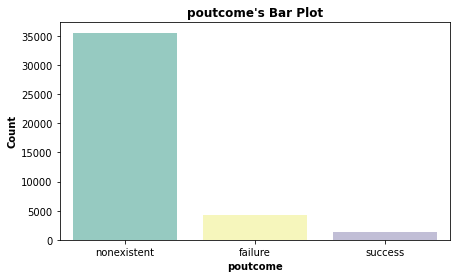

INFO:
nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


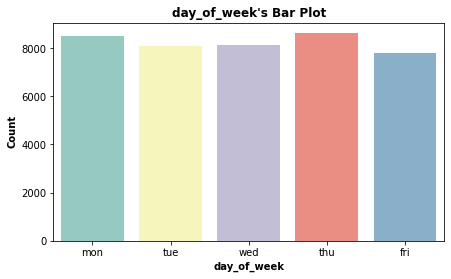

INFO:
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


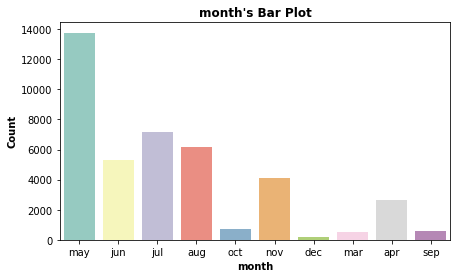

INFO:
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


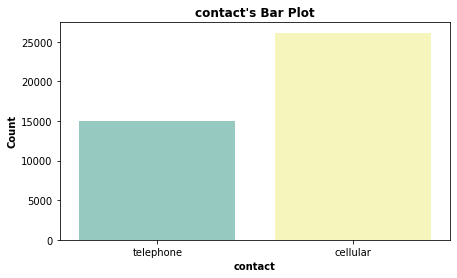

INFO:
cellular     26144
telephone    15044
Name: contact, dtype: int64


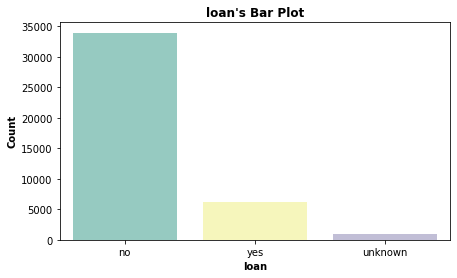

INFO:
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


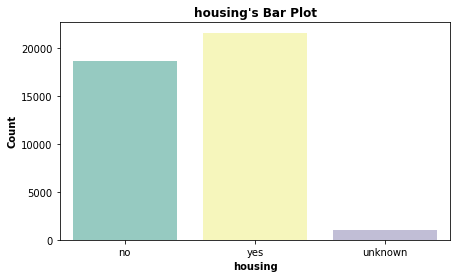

INFO:
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


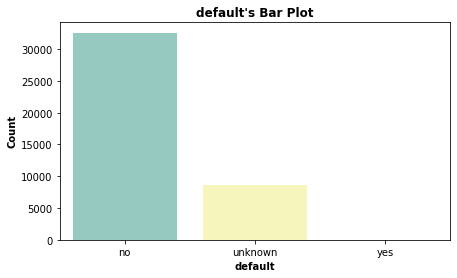

INFO:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64


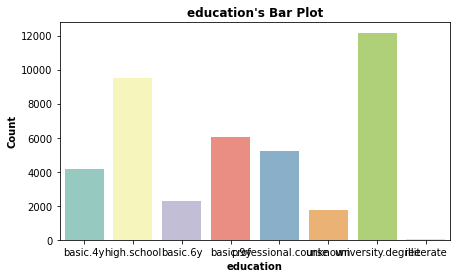

INFO:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


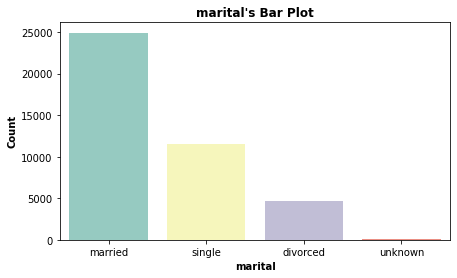

INFO:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


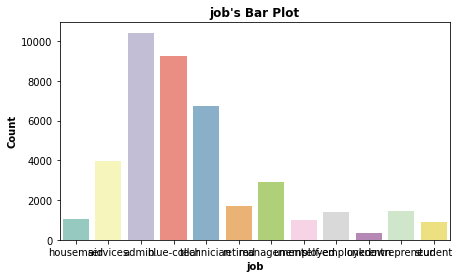

INFO:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


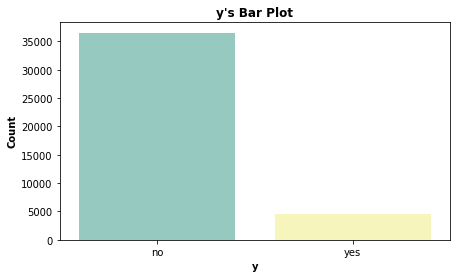

INFO:
no     36548
yes     4640
Name: y, dtype: int64


In [6]:
for i in categorical_variables:
    bar_categorical(i)

<a id = "5"></a>
### Visualization of Categorical Variables

In [7]:
numerical_variables = ["nr.employed", "euribor3m", "cons.conf.idx", 
                       "cons.price.idx", "emp.var.rate", "previous", "pdays", "campaign", "age"]

def hist_numerical(feature):
    plt.figure(figsize = (7, 4))
    sns.histplot(data=data, x = "{}".format(feature), bins=50, binwidth=3)
    plt.ylabel("Frequency", fontweight = "bold")
    plt.xlabel("{}".format(feature), fontweight = "bold")
    plt.title("{}'s Histogram Plot".format(feature), fontweight = "bold")
    plt.show()
    print("DESCRIBE:")
    print(data[feature].describe())

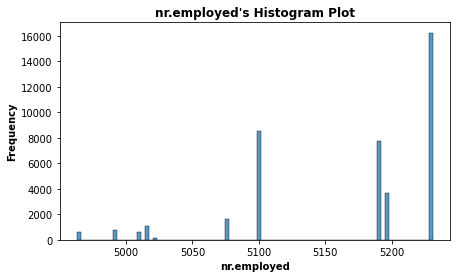

DESCRIBE:
count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64


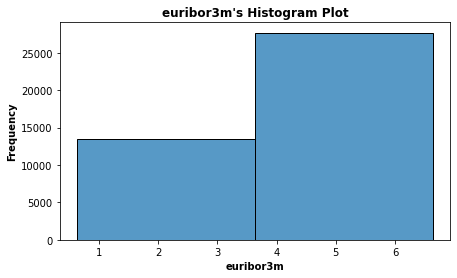

DESCRIBE:
count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64


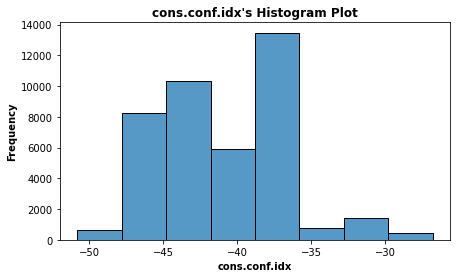

DESCRIBE:
count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64


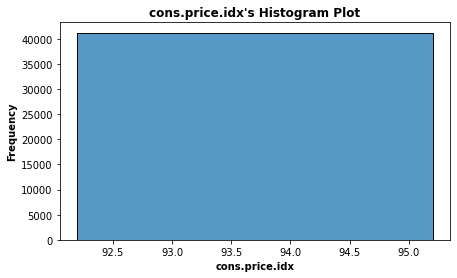

DESCRIBE:
count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64


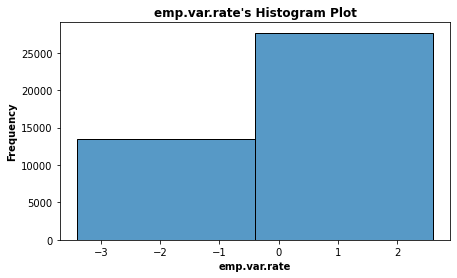

DESCRIBE:
count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64


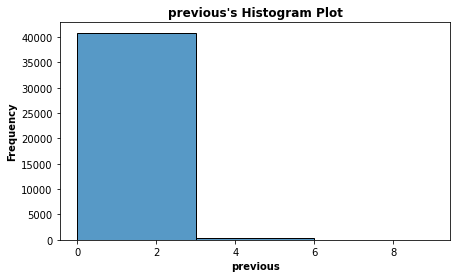

DESCRIBE:
count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64


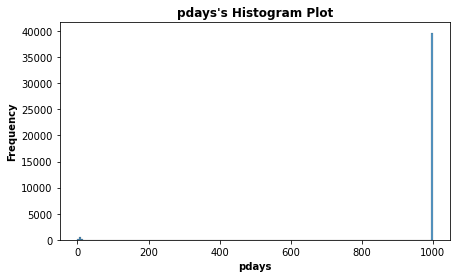

DESCRIBE:
count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64


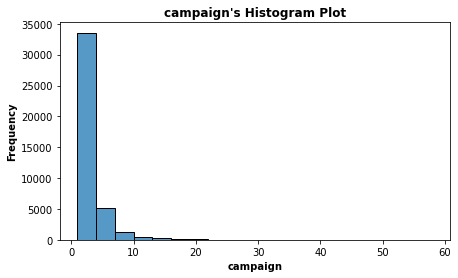

DESCRIBE:
count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64


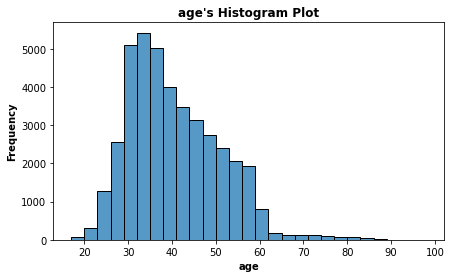

DESCRIBE:
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


In [8]:
for i in numerical_variables:
    hist_numerical(i)

<a id = "6"></a>
## Data Analysis

<a id = "7"></a>

### Handling Missing Values
Distribution of the Unknowns on the Categorical Variables

In [9]:
for i in categorical_variables:
    if "unknown" in data[i].value_counts():
        print(data[i].value_counts(normalize=True))
        print("\n")

no         0.824269
yes        0.151695
unknown    0.024036
Name: loan, dtype: float64


yes        0.523842
no         0.452122
unknown    0.024036
Name: housing, dtype: float64


no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64


university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64


married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64


admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job

Missing values in the "loan" and "default" is minority, and in these columns, "no" is majority. 

Thus, I will replace the unknown values as "no".
For the other variables,the few lines of [github.com/np788/bankmarketing](http://) notebook was used.

In [10]:
data["loan"].replace({"unknown": "no"}, inplace=True)
data["default"].replace({"unknown": "no"}, inplace=True)
data.loc[(data['age']>60) & (data['job']=='unknown'), 'job'] = 'retired'
data.loc[(data['education']=='unknown') & (data['job']=='management'), 'education'] = 'university.degree'
data.loc[(data['education']=='unknown') & (data['job']=='services'), 'education'] = 'high.school'
data.loc[(data['education']=='unknown') & (data['job']=='housemaid'), 'education'] = 'basic.4y'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.4y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.6y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.9y'), 'job'] = 'blue-collar'
data.loc[(data['job']=='unknown') & (data['education']=='professional.course'), 'job'] = 'technician'

In [11]:
data.drop(data.index[data['job'] == "unknown"], inplace=True)
data.drop(data.index[data['loan'] == "unknown"], inplace=True)
data.drop(data.index[data['marital'] == "unknown"], inplace=True)
data.drop(data.index[data['education'] == "unknown"], inplace=True)
data.drop(data.index[data['housing'] == "unknown"], inplace=True)

The empty output of the function below indicates that we have gotten rid of all unknown values.

In [12]:
for i in categorical_variables:
    if "unknown" in data[i].value_counts():
        print(data[i].value_counts())
        print("\n")

In [13]:
numerical_variables = ['age','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']

In [14]:
data[numerical_variables].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,38671.00000,38671.000000,38671.000000,38671.000000,38671.000000,38671.000000,38671.000000,38671.000000,38671.000000
mean,39.90957,2.567169,963.409015,0.170076,0.084645,93.571630,-40.530447,3.625868,5167.481824
std,10.30096,2.768077,184.601148,0.488196,1.566137,0.576583,4.621694,1.729611,71.737645
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Correlation Between Categorical Variables and Target Value

In [15]:
data["y"] = [1 if i == 'yes' else 0 for i in data["y"]]

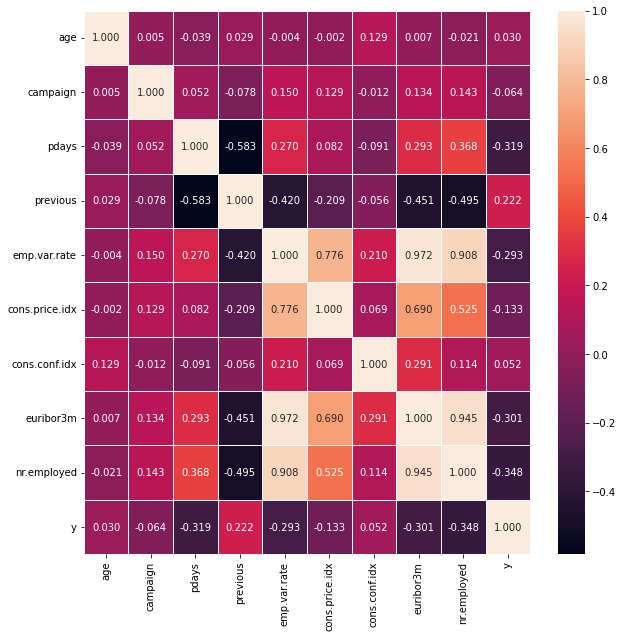

In [16]:
f, ax = plt.subplots(figsize= (10,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt=".3f", ax = ax)
plt.show()

Checking the Missing Values in the Numerical Variables

In [17]:
for i in data[numerical_variables]:
    for j in data[i]:
        if j == 999:
            print(i)
            break

pdays


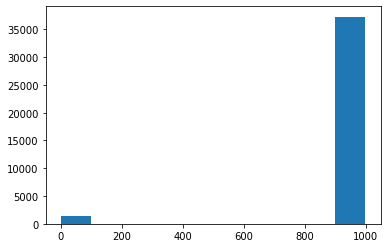

In [18]:
plt.hist(data["pdays"])
plt.show()

Only "pdays" has missing values. According to information which is provided by the data creator the missing values in the categorical variables were replaced as "999".

It is seen that the number of missing values is majority.

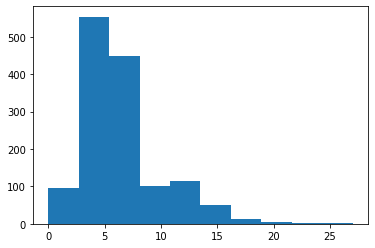

In [19]:
plt.hist(data.loc[data["pdays"] != 999, "pdays"])
plt.show()

In [20]:
data['pdays_missing'] = 0
data['pdays_less_5'] = 0
data['pdays_greater_15'] = 0
data['pdays_bet_5_15'] = 0
data['pdays_missing'][data['pdays'] == 999] = 1
data['pdays_less_5'][data['pdays'] < 5] = 1
data['pdays_greater_15'][(data['pdays'] > 15) & (data['pdays']<999)] = 1
data['pdays_bet_5_15'][(data['pdays'] >= 5) & (data['pdays'] <= 15)] = 1
data.drop('pdays', axis=1, inplace = True)

In [21]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,1,1,0,0,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,-1.1,94.767,-50.8,1.028,4963.6,1,1,0,0,0


<a id = "8"></a>

### Handling Outliers

Wikipedia definition: In statistics, an **outlier** is an observation point that is distant from other observations.

Outliers may be caused by many different reasons. Such as a mistake during data collection or it can be just an sign of variance in your data. 

    1st quartile (Q1): %25
    2nd quartile (Q2): Median value
    3rd quartile (Q3): %75

    IQR = Q3 - Q1

    Lower Outlier Limit = Q1 - (1.5 * IQR)
    Higher Outlier Limit = Q3 + (1.5 * IQR)
    
    Values that lower than lower outlier limit and higher than higher outlier limit are our outliers.



Box plots are one of the good ways to see outliers.

In [22]:
def outlier_plotting(feature):
    outlier = []
    outlier_indexes = []    
    # Plotting section
    plt.figure(figsize=(7,2))
    sns.boxplot(x=data[feature], palette="Set3")
    plt.title("{}'s Outlier Box Plot".format(feature), weight = "bold")
    plt.xlabel(feature, weight = "bold")
    plt.show()
    
    # Outlier computing
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_outlier_limit = Q1 - (1.5 * IQR)
    higher_outlier_limit = Q3 + (1.5 * IQR)
    
    print("Values lower than {:.2f} and higher than {:.2f} are outliers for {}. \n"
          .format(lower_outlier_limit,higher_outlier_limit,feature))

    # There are different ways to detect and show outlier values, I will use Z-Score method instead of writing conditional function.
    
    # Outlier detecting
    threshold = 3

    for i in data[feature]:
        z = (i-data[feature].mean())/data[feature].std()
        if z > threshold: 
            outlier.append(i)
            index = data[data[feature] == i].index[0]
            outlier_indexes.append(index)      
    if outlier == []:
        print("No any outliers for {}.".format(feature))

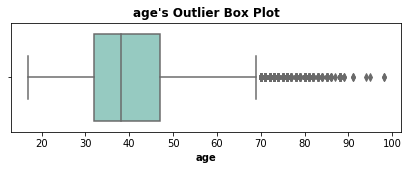

Values lower than 9.50 and higher than 69.50 are outliers for age. 



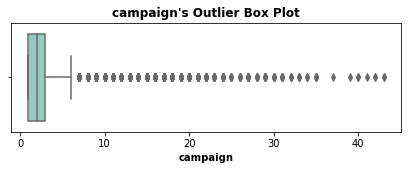

Values lower than -2.00 and higher than 6.00 are outliers for campaign. 



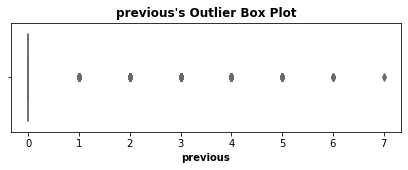

Values lower than 0.00 and higher than 0.00 are outliers for previous. 



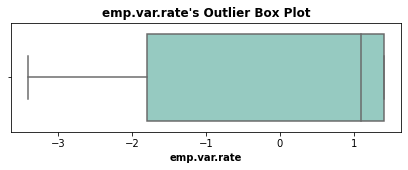

Values lower than -6.60 and higher than 6.20 are outliers for emp.var.rate. 

No any outliers for emp.var.rate.


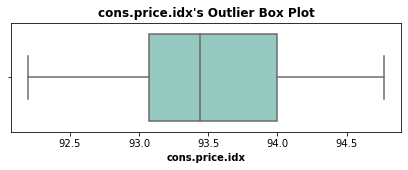

Values lower than 91.70 and higher than 95.37 are outliers for cons.price.idx. 

No any outliers for cons.price.idx.


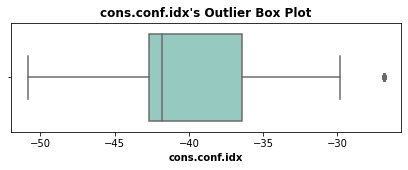

Values lower than -52.15 and higher than -26.95 are outliers for cons.conf.idx. 

No any outliers for cons.conf.idx.


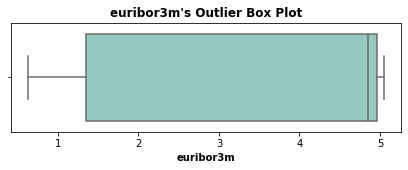

Values lower than -4.08 and higher than 10.39 are outliers for euribor3m. 

No any outliers for euribor3m.


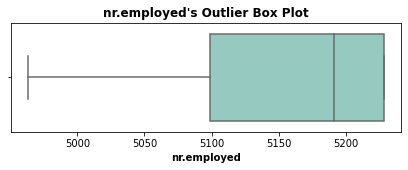

Values lower than 4905.60 and higher than 5421.60 are outliers for nr.employed. 

No any outliers for nr.employed.


In [23]:
new_numerical_variables = ['age','campaign', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']

for i in new_numerical_variables:
    outlier_plotting(i)

In [24]:
def outlier_index(data, feature):

    outlier_indexes = []    

    # Outlier detecting
    
    threshold = 3
    
    for a in feature:
        for i in data[a]:
            z = (i-data[a].mean())/data[a].std()
            if z > threshold: 
                index = data[data[a] == i].index[0]
                # Here we detected the outlier, now we need to save its index. 
                # Becasue we need need to display its row via "loc" method and remove from the data.
                outlier_indexes.append(index) 
    return outlier_indexes

In [25]:
data.loc[outlier_index(data,new_numerical_variables)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,pdays_less_5,pdays_greater_15,pdays_bet_5_15
27757,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,...,-1.8,92.843,-50.0,1.757,5099.1,0,1,0,0,0
27780,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,...,-1.8,92.843,-50.0,1.687,5099.1,0,1,0,0,0
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,-1.8,92.843,-50.0,1.663,5099.1,0,1,0,0,0
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,-1.8,92.843,-50.0,1.663,5099.1,0,1,0,0,0
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,-1.8,92.843,-50.0,1.663,5099.1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25996,35,management,married,university.degree,no,yes,yes,telephone,nov,wed,...,-0.1,93.200,-42.0,4.120,5195.8,0,0,1,0,0
36460,55,retired,married,basic.4y,no,no,no,cellular,jun,tue,...,-2.9,92.963,-40.8,1.262,5076.2,0,0,1,0,0
25996,35,management,married,university.degree,no,yes,yes,telephone,nov,wed,...,-0.1,93.200,-42.0,4.120,5195.8,0,0,1,0,0
40395,48,admin.,divorced,university.degree,no,no,no,cellular,aug,thu,...,-1.7,94.027,-38.3,0.904,4991.6,1,0,1,0,0


In [26]:
data = data.drop(outlier_index(data,new_numerical_variables),axis = 0).reset_index(drop = True)
# There are no outliers in data anymore.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38611 entries, 0 to 38610
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               38611 non-null  int64  
 1   job               38611 non-null  object 
 2   marital           38611 non-null  object 
 3   education         38611 non-null  object 
 4   default           38611 non-null  object 
 5   housing           38611 non-null  object 
 6   loan              38611 non-null  object 
 7   contact           38611 non-null  object 
 8   month             38611 non-null  object 
 9   day_of_week       38611 non-null  object 
 10  campaign          38611 non-null  int64  
 11  previous          38611 non-null  int64  
 12  poutcome          38611 non-null  object 
 13  emp.var.rate      38611 non-null  float64
 14  cons.price.idx    38611 non-null  float64
 15  cons.conf.idx     38611 non-null  float64
 16  euribor3m         38611 non-null  float6

<a id = "9"></a>
## Modelling

<a id = "10"></a>

### Preparing Data

In [27]:
data[categorical_variables]

,poutcome,day_of_week,month,contact,loan,housing,default,education,marital,job,y
0,nonexistent,mon,may,telephone,no,no,no,basic.4y,married,housemaid,0
1,nonexistent,mon,may,telephone,no,no,no,high.school,married,services,0
2,nonexistent,mon,may,telephone,no,yes,no,high.school,married,services,0
3,nonexistent,mon,may,telephone,no,no,no,basic.6y,married,admin.,0
4,nonexistent,mon,may,telephone,yes,no,no,high.school,married,services,0
...,...,...,...,...,...,...,...,...,...,...,...
38606,nonexistent,fri,nov,cellular,no,yes,no,professional.course,married,retired,1
38607,nonexistent,fri,nov,cellular,no,no,no,professional.course,married,blue-collar,0
38608,nonexistent,fri,nov,cellular,no,yes,no,university.degree,married,retired,0
38609,nonexistent,fri,nov,cellular,no,no,no,professional.course,married,technician,1


In order to use the data for modelling, it is necessary that convert categorical variables into numerical.

In [28]:
def dummy(data, columns):
    for i in columns:
        if i == "y":
            continue
        else:
            data = pd.get_dummies(data, columns = [i])
    return data

In [29]:
data = dummy(data, categorical_variables)

In [30]:
data

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_missing,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38606,73,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,1,...,0,0,0,0,1,0,0,0,0,0
38607,46,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,...,1,0,0,0,0,0,0,0,0,0
38608,56,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,...,0,0,0,0,1,0,0,0,0,0
38609,44,1,0,-1.1,94.767,-50.8,1.028,4963.6,1,1,...,0,0,0,0,0,0,0,0,1,0


Now, the data is ready for modelling.

Spliting the target variable as "y".

In [31]:
y = data.loc[:,["y"]]
x = data.drop(["y"],1)

Scaling all values in the data between 0 and 1.

In [32]:
x_normalized = (x - np.min(x)) / ((np.max(x) - np.min(x)))

<a id = "11"></a>

### Hyperparameter Tunning

Train Test Split:

In [33]:
# Split Data to Train and Validation
X_train, X_val, y_train, y_val = train_test_split(x_normalized, y.values.ravel(), train_size = 0.75, stratify = y.values.ravel(),random_state = 42)

# a list where train data indices are -1 and validation data indices are 0
split_index = [-1 if x in X_train.index else 0 for x in x_normalized.index]

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

Parameters for two algoritghm:

In [34]:
logreg_param_grid = {"C":np.logspace(-20,20,10),
                    "max_iter": [20000,50000,100000],
                    "penalty": ["l1","l2"],
                    "solver": ["saga","newton-cg","lbfgs","liblinear"],
                    "class_weight": ["balanced"]}

xgb_param_grid = {'max_depth': [10,20],
                  'n_estimators': [500,1000]}

r_s = 42
classifier_parameters = [xgb_param_grid,
                         logreg_param_grid]
                         

classifiers = [XGBClassifier(random_state = r_s),
               LogisticRegression(random_state = r_s)]

Hyperparameter Tunning Function - GridSearch: 

In [35]:
def param_tunning(learner_list, params, X_train, y_train, X_val, y_val): 
    
    best_estimators = []
    scorer = make_scorer(f1_score)
    hyp_results = {}
    hyp_final_results = []
    
    for i, j in zip(learner_list, params):
        
        hyp_results['Algorithm'] = i.__class__.__name__
        print("Training {}".format(i.__class__.__name__))
        
        clf = GridSearchCV(estimator = i,
                   cv=pds,
                   scoring= scorer,
                   param_grid=j,
                   n_jobs = -1,
                   verbose = 1)
        # Fit with all data
        clf.fit(x_normalized, y.values.ravel())
        best_estimators.append(clf.best_estimator_)
               
        predictions_test = clf.predict(X_val)
        prediction_train = clf.predict(X_train)
        
        hyp_results['Accuracy: Test'] = accuracy_score(y_val, predictions_test)
        hyp_results['Accuracy: Train'] = accuracy_score(y_train, prediction_train)
        hyp_results['F1 Score: Test'] = f1_score(y_val, predictions_test)
        hyp_results['F1 Score: Train'] = f1_score(y_train, prediction_train)
        hyp_results['Precision: Test'] = precision_score(y_val, predictions_test)
        hyp_results['Precision: Train'] = precision_score(y_train, prediction_train)
        hyp_results['Recall: Test'] = recall_score(y_val, predictions_test)
        hyp_results['Recall: Train'] = recall_score(y_train, prediction_train)
        hyp_results["Best Parameters"] = clf.best_params_
        hyp_final_results.append(hyp_results.copy())   
    return hyp_final_results, best_estimators

In [36]:
df_models, best_estimators = param_tunning(classifiers, classifier_parameters, X_train, y_train, X_val, y_val)

Training XGBClassifier
Fitting 1 folds for each of 4 candidates, totalling 4 fits
Training LogisticRegression
Fitting 1 folds for each of 240 candidates, totalling 240 fits


<a id = "11"></a>

### Results

In [37]:
df_models = pd.DataFrame(df_models)
df_models = df_models.reindex(columns = ['Algorithm','Accuracy: Test','Accuracy: Train','F1 Score: Test','F1 Score: Train',
                                        'Precision: Test','Precision: Train','Recall: Test','Recall: Train',"Best Parameters"])

df_models.sort_values(by = 'F1 Score: Test', inplace = True, ascending = False)
df_models.reset_index(drop = True)

,Algorithm,Accuracy: Test,Accuracy: Train,F1 Score: Test,F1 Score: Train,Precision: Test,Precision: Train,Recall: Test,Recall: Train,Best Parameters
0,XGBClassifier,0.993992,0.993232,0.972512,0.969066,0.991304,0.986187,0.954419,0.952529,"{'max_depth': 20, 'n_estimators': 500}"
1,LogisticRegression,0.830623,0.828407,0.452261,0.443997,0.353403,0.347217,0.627907,0.615576,"{'C': 166.81005372000558, 'class_weight': 'bal..."


In [38]:
best_estimators[0]

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [39]:
best_estimators[1]

LogisticRegression(C=166.81005372000558, class_weight='balanced',
                   max_iter=20000, random_state=42)